### Imports

In [1]:
%load_ext autoreload
%autoreload 2
#%matplotlib notebook
%matplotlib inline

In [2]:
# Computational packages
import numpy as np
import matplotlib.pyplot as plt
import torch
import tqdm

# General packages
import datetime
import sys
import os

# custom packages
import ratsimulator
from ratsimulator.Environment import Rectangle
import spatial_maps as sm # CINPLA spatial maps

# avoid adding multiple relave paths to sys.path
sys.path.append("../../src") if "../../src" not in sys.path else None 
from PlaceCells import PlaceCells
from Models import SorscherRNN
from Experiment import Experiment
from methods import *
from datahandling import *

### Setup Experiment

In [17]:
base_path = "/mnt/WD12TB-HDD"
experiment = Experiment(name = 'default', base_path=base_path)
experiment.setup()

Experiment <default> already EXISTS. Loading experiment settings!
Loading experiment details
This experiment has ALREADY been setup - SKIPPING.


False

In [18]:
# detach experiment specifics
params = experiment.params
environments = experiment.environments
agents = experiment.agents
pc_ensembles = experiment.pc_ensembles
paths = experiment.paths

num_workers = 16
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"{device=}")

device=device(type='cuda')


In [19]:
plt.rcParams.update({'figure.figsize': (3,3), 'figure.dpi': 150, 'legend.frameon': False})
# sns.set_style('white', {'legend.frameon': False})
palette = {'setosa': '#7fc97f', 'versicolor': '#beaed4', 'virginica': '#fdc086'}
palette2 = {0: '#e41a1c', 1: '#377eb8', 2: '#4daf4a'}
palette3 = {0: '#8dd3c7', 1: '#ffffb3', 2: '#bebada'}

def savefig(fname,filetype='svg'):
    plot_path = paths['experiment'] / 'plots'
    if not os.path.exists(plot_path):
        os.makedirs(plot_path)
    plt.savefig(plot_path / f'{fname}.{filetype}', bbox_inches='tight', transparent=True)
    
def border_color(ax, color):
    return [spine.set_color(color) for spine in ax.spines.values()]

In [47]:
with open(paths['ratemaps'] / ('env_0/' + filenames(paths['ratemaps'] / 'env_0')[-1]), 'rb') as f:
    ratemaps = pickle.load(f)
    
with open(paths['grid_scores'] / (paths['grid_scores'] / '0999_env_0.pkl'), 'rb') as f:
    grid_scores = pickle.load(f)
sorted_scores = np.argsort(grid_scores)[::-1]

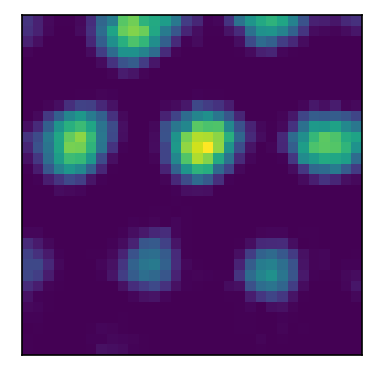

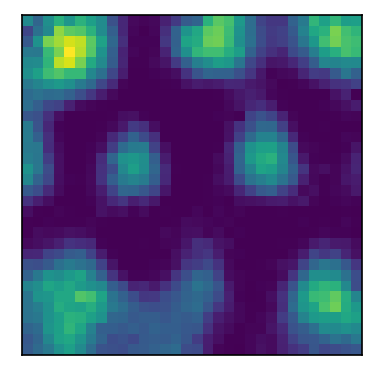

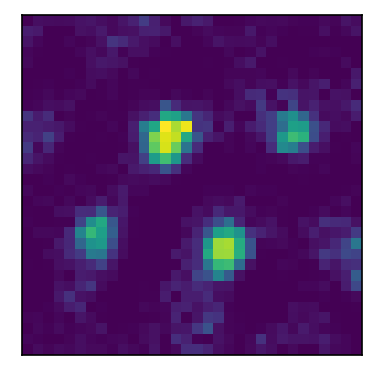

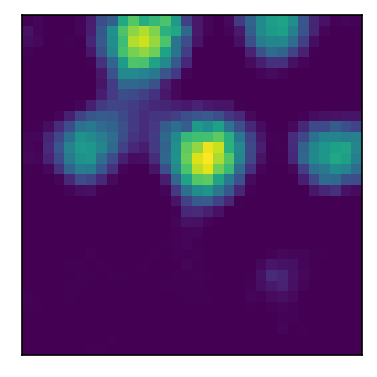

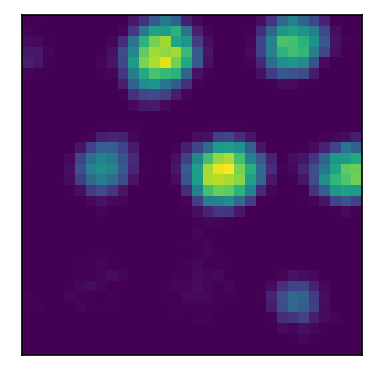

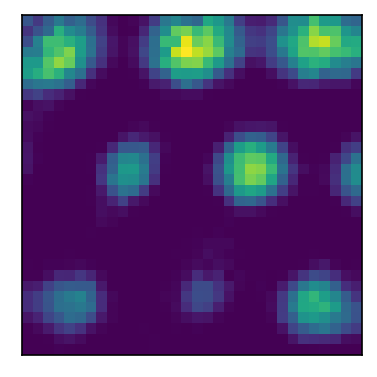

In [60]:
def plot_grid_cell(ratemap):
    fig,ax = plt.subplots()
    plt.imshow(ratemap)#.T, origin='lower')
    ax.set_xticks([], [])
    ax.set_yticks([], [])

for i in range(4,10):
    plot_grid_cell(ratemaps[sorted_scores[i]])
    savefig(f'gc_{sorted_scores[i]}','pdf')